In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

# Data Information

In [2]:
train_file_id = '1-V0feVc2Bx4apPdvHaK1aWxLfCl0YSYG'
train_output_file = 'train.csv'  

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=1-V0feVc2Bx4apPdvHaK1aWxLfCl0YSYG
To: d:\Document\Bangkit\Binary Classifcation with NN\train.csv
100%|██████████| 3.81M/3.81M [00:05<00:00, 648kB/s]


# Data Information

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
variables = [col for col in df.columns if df[col].nunique() <= 10]
for var in variables:
  print(f"====={var}=====")
  unique_values = df[var].unique()
  n_unique_values = df[var].nunique()
  value_counts = df[var].value_counts()

  print(f"Unique values in {var}: {unique_values}")
  print(f"Number of unique values in {var}: {n_unique_values}")
  print(f"Value counts in {var}:\n{value_counts}\n")

=====gender=====
Unique values in gender: ['Female' 'Male' 'Other']
Number of unique values in gender: 3
Value counts in gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

=====hypertension=====
Unique values in hypertension: [0 1]
Number of unique values in hypertension: 2
Value counts in hypertension:
hypertension
0    92515
1     7485
Name: count, dtype: int64

=====heart_disease=====
Unique values in heart_disease: [1 0]
Number of unique values in heart_disease: 2
Value counts in heart_disease:
heart_disease
0    96058
1     3942
Name: count, dtype: int64

=====smoking_history=====
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Number of unique values in smoking_history: 6
Value counts in smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

=====diabetes=====
Unique 

# Feature Engineering

## Encoding

In [6]:
le = LabelEncoder()

columns = ['gender', 'smoking_history']
for col in columns:
    df[col] = le.fit_transform(df[col])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


## Scaler

In [7]:
num_columns = [col for col in df.columns if col not in variables]
ss = StandardScaler()

df[num_columns] = ss.fit_transform(df[num_columns])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,4,-0.321056,1.001706,0.047704,0
1,0,0.538006,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,-0.616691,0,0,4,-0.000116,0.161108,0.489878,0
3,0,-0.261399,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,1.515058,1,1,1,-1.081970,-0.679490,0.416183,0


# Modelling

## Train Test Split

In [8]:
features = [col for col in df.columns if col not in ['diabetes']]
target = 'diabetes'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 16, validation_data = (X_test, y_test))

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9451 - loss: 0.1707 - val_accuracy: 0.9653 - val_loss: 0.0995
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9669 - loss: 0.1017 - val_accuracy: 0.9706 - val_loss: 0.0859
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9688 - loss: 0.0932 - val_accuracy: 0.9708 - val_loss: 0.0851
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9693 - loss: 0.0912 - val_accuracy: 0.9716 - val_loss: 0.0831
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9706 - loss: 0.0879 - val_accuracy: 0.9718 - val_loss: 0.0828
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9704 - loss: 0.0880 - val_accuracy: 0.9711 - val_loss: 0.0838
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9712 - loss: 0.0865 - val_accuracy: 0.9718 - val_loss: 0.0823
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9712 - loss: 0.0857 - 

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9716 - loss: 0.0826
Test loss: 0.0817
Test accuracy: 0.9719


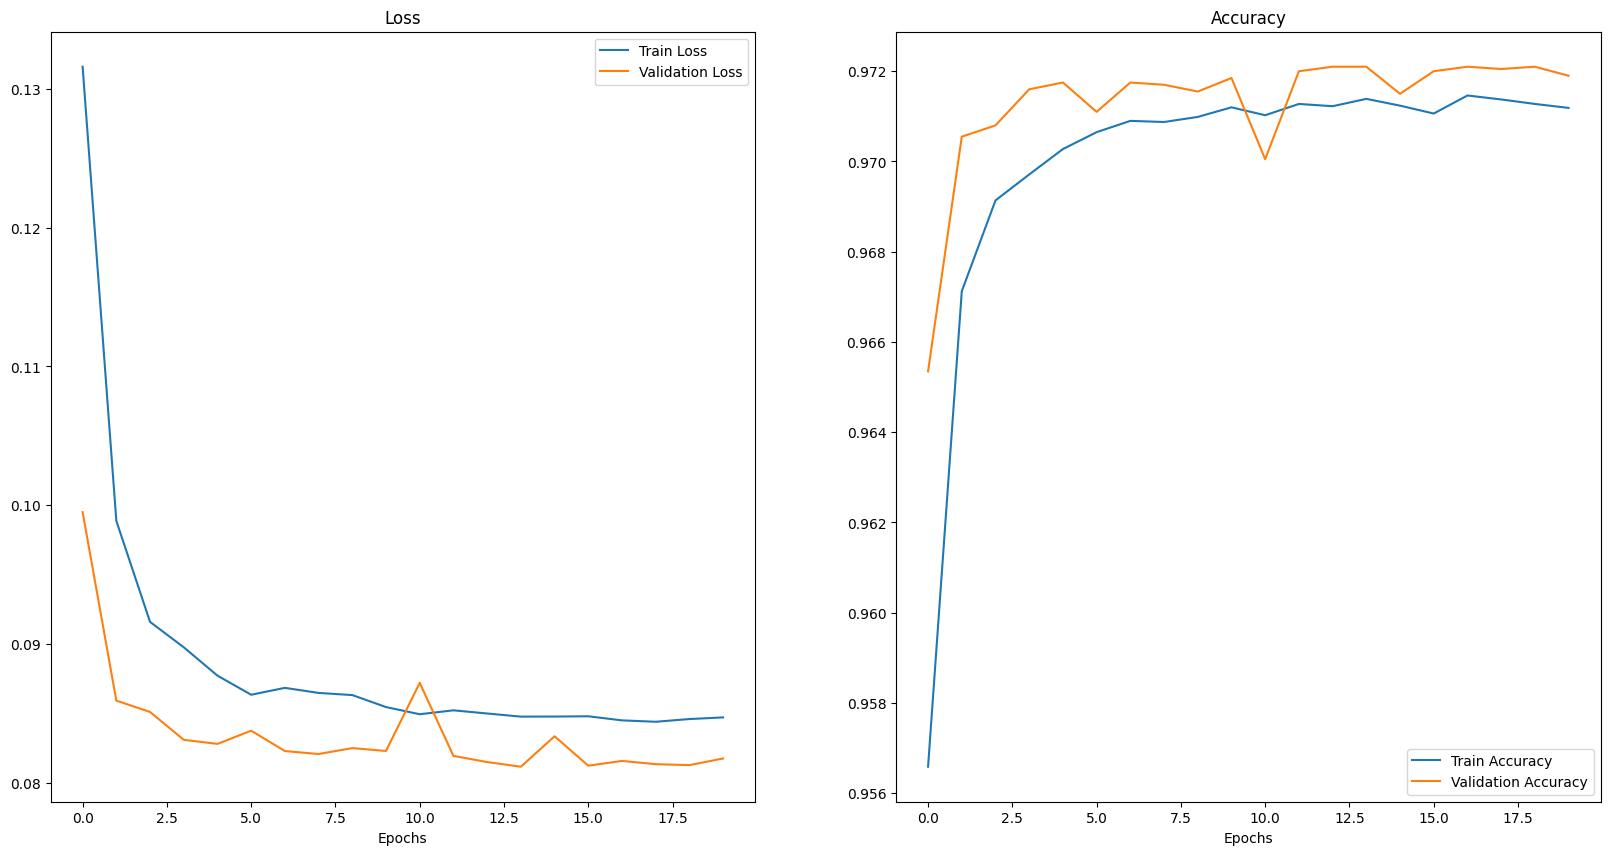

In [13]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(train_loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.legend()

ax2.plot(train_acc, label='Train Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.legend()

plt.show()